## Learning Objectives
By the end of this notebook, you will be able to:
- Understand feature engineering principles and techniques
- Evaluate machine learning models using appropriate metrics
- Debug common machine learning problems
- Implement multi-class and multi-label classification
- Apply these concepts to real-world datasets

---

## Part 1: Feature Design and Engineering

### What is Feature Engineering?

Feature engineering is the process of using domain knowledge to extract features from raw data that make machine learning algorithms work better. It's often considered one of the most important aspects of applied machine learning because the quality of features directly impacts model performance.

**Key Principles:**
1. **Relevance**: Features should be related to the target variable
2. **Informativeness**: Features should provide unique information
3. **Scalability**: Features should work with different data sizes
4. **Stability**: Features should be robust across different time periods

### Types of Feature Engineering

#### 1. Numerical Features
- **Scaling/Normalization**: StandardScaler, MinMaxScaler, RobustScaler
- **Transformation**: Log, Square root, Box-Cox transformations
- **Binning**: Converting continuous variables into categorical
- **Polynomial Features**: Creating interaction terms

#### 2. Categorical Features
- **One-Hot Encoding**: Creating binary columns for each category
- **Label Encoding**: Assigning numerical values to categories
- **Target Encoding**: Using target statistics for encoding
- **Frequency Encoding**: Using category frequency as feature

#### 3. Text Features
- **Bag of Words**: Word frequency vectors
- **TF-IDF**: Term frequency-inverse document frequency
- **N-grams**: Sequences of n words
- **Word Embeddings**: Dense vector representations

#### 4. Time Series Features
- **Lag Features**: Previous time step values
- **Rolling Statistics**: Moving averages, rolling standard deviation
- **Seasonal Features**: Day of week, month, quarter
- **Time-based Features**: Hour, day, month extracted from timestamps

---

## Part 2: Model Evaluation

### Evaluation Metrics Beyond Accuracy

While accuracy is intuitive, it can be misleading, especially with imbalanced datasets. Here are key metrics:

#### For Classification:
1. **Precision**: TP / (TP + FP) - How many positive predictions were correct?
2. **Recall (Sensitivity)**: TP / (TP + FN) - How many actual positives were found?
3. **F1-Score**: Harmonic mean of precision and recall
4. **ROC-AUC**: Area under the Receiver Operating Characteristic curve
5. **Precision-Recall AUC**: Better for imbalanced datasets

#### For Regression:
1. **Mean Absolute Error (MAE)**: Average absolute differences
2. **Mean Squared Error (MSE)**: Average squared differences
3. **Root Mean Squared Error (RMSE)**: Square root of MSE
4. **R-squared**: Proportion of variance explained

### Cross-Validation Strategies

1. **K-Fold Cross-Validation**: Split data into k folds
2. **Stratified K-Fold**: Maintains class distribution in each fold
3. **Time Series Split**: Respects temporal order in time series data
4. **Leave-One-Out**: Each sample is a validation set

---

## Part 3: Debugging Machine Learning Models

### Common Problems and Solutions

#### 1. Overfitting
**Symptoms**: High training accuracy, low validation accuracy
**Solutions**: 
- Regularization (L1, L2)
- Early stopping
- Reduce model complexity
- More training data
- Dropout (for neural networks)

#### 2. Underfitting
**Symptoms**: Low training and validation accuracy
**Solutions**:
- Increase model complexity
- Add more features
- Reduce regularization
- Train for more epochs

#### 3. Data Leakage
**Definition**: When future information inadvertently influences the model
**Examples**: 
- Using future data to predict past events
- Target information in features
- Data preprocessing before train/test split

#### 4. Imbalanced Data
**Symptoms**: Good overall accuracy but poor minority class performance
**Solutions**:
- Resampling (SMOTE, undersampling)
- Class weights
- Different evaluation metrics
- Ensemble methods

---

## Part 4: Beyond Binary Classification

### Multi-class Classification

Unlike binary classification (2 classes), multi-class classification involves predicting among 3 or more classes.

**Approaches:**
1. **One-vs-Rest (OvR)**: Train one classifier per class
2. **One-vs-One (OvO)**: Train one classifier for each pair of classes
3. **Native Multi-class**: Algorithms that naturally handle multiple classes

**Algorithms:**
- Logistic Regression (with multinomial)
- Random Forest
- Support Vector Machines
- Neural Networks
- Naive Bayes

### Multi-label Classification

In multi-label classification, each instance can belong to multiple classes simultaneously.

**Examples:**
- Text categorization (news can be sports AND politics)
- Image tagging (photo can have person AND car AND building)
- Gene function prediction

**Approaches:**
1. **Binary Relevance**: Train one binary classifier per label
2. **Classifier Chains**: Account for label dependencies
3. **Label Powerset**: Treat each unique combination as a class

### Evaluation for Multi-class/Multi-label

**Multi-class Metrics:**
- Accuracy
- Macro/Micro averaged Precision, Recall, F1
- Confusion Matrix
- Classification Report

**Multi-label Metrics:**
- Hamming Loss
- Subset Accuracy
- Jaccard Score
- Label-based metrics (precision, recall per label)


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.datasets import load_wine, load_digits, make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
# Load the wine dataset (multi-class classification)
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {target_names}")
print(f"Class distribution: {np.bincount(y)}")

# Create DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display basic statistics
print("\nDataset Info:")
print(df.describe())

Dataset shape: (178, 13)
Number of classes: 3
Classes: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]

Dataset Info:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270

In [6]:
# Feature Engineering Examples

# 1. Polynomial Features (interaction terms)
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features for first 3 features (to keep it manageable)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X[:, :3])

print(f"Original features: {X[:, :3].shape[1]}")
print(f"After polynomial features: {X_poly.shape[1]}")
print("New feature names:", poly.get_feature_names_out(['alcohol', 'malic_acid', 'ash']))

Original features: 3
After polynomial features: 6
New feature names: ['alcohol' 'malic_acid' 'ash' 'alcohol malic_acid' 'alcohol ash'
 'malic_acid ash']


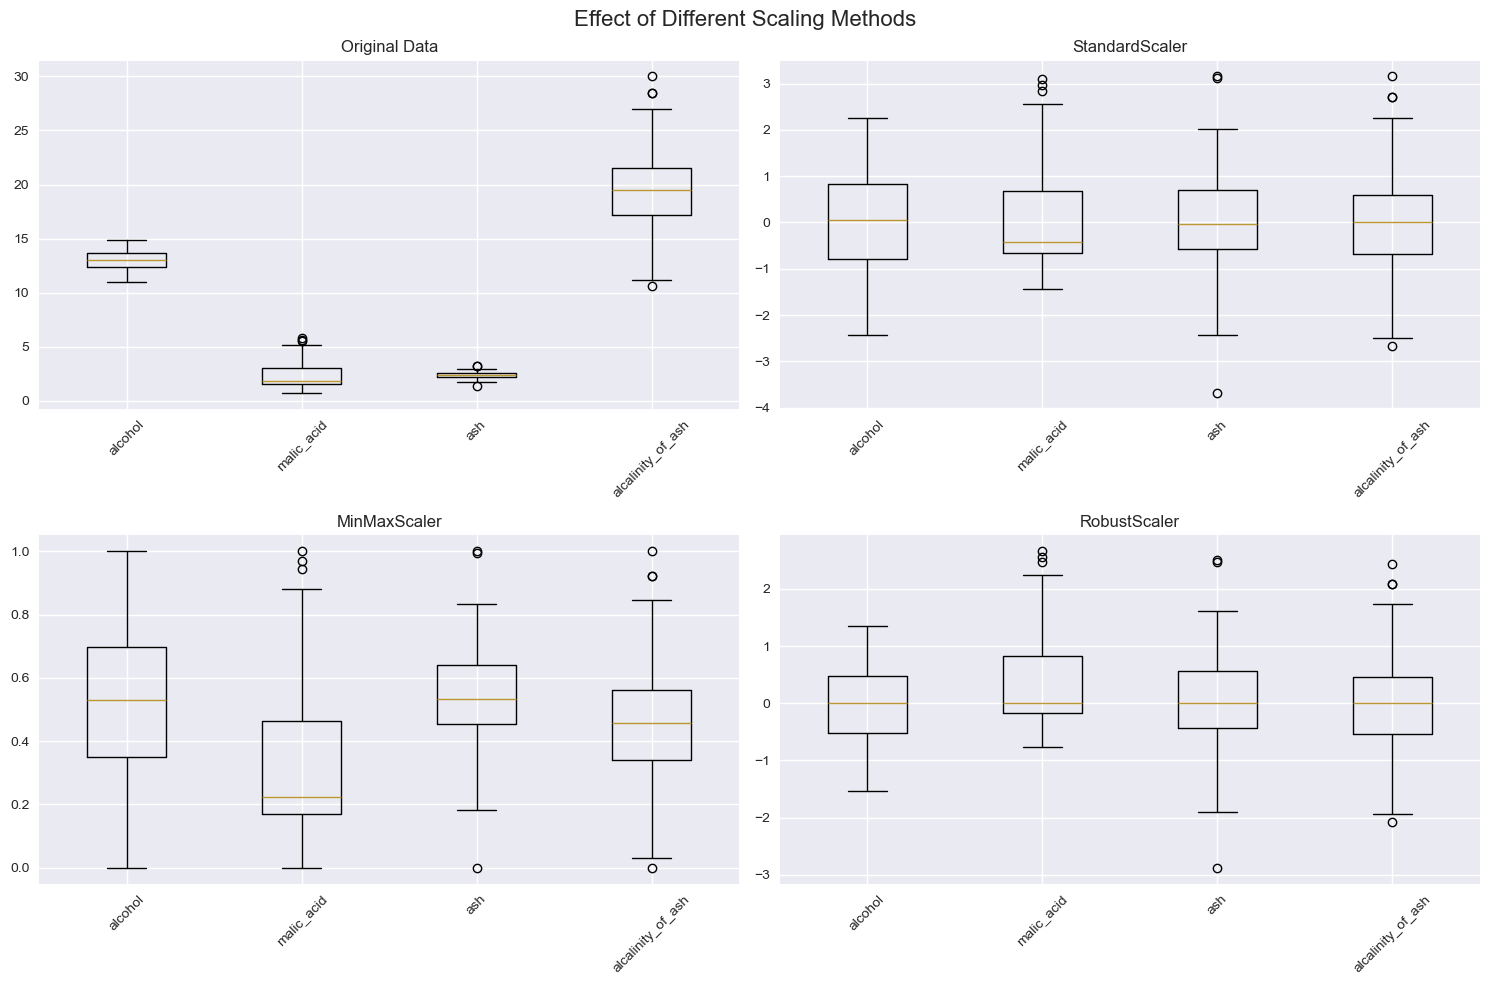

In [8]:
# 2. Feature Scaling Comparison
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Original data
X_original = X[:, :4]  # First 4 features for visualization

# Different scaling methods
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

X_std = scaler_std.fit_transform(X_original)
X_minmax = scaler_minmax.fit_transform(X_original)
X_robust = scaler_robust.fit_transform(X_original)

# Visualize the effect of scaling
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Effect of Different Scaling Methods', fontsize=16)

# Original data
axes[0, 0].boxplot(X_original)
axes[0, 0].set_title('Original Data')
axes[0, 0].set_xticklabels(feature_names[:4], rotation=45)

# StandardScaler
axes[0, 1].boxplot(X_std)
axes[0, 1].set_title('StandardScaler')
axes[0, 1].set_xticklabels(feature_names[:4], rotation=45)

# MinMaxScaler
axes[1, 0].boxplot(X_minmax)
axes[1, 0].set_title('MinMaxScaler')
axes[1, 0].set_xticklabels(feature_names[:4], rotation=45)

# RobustScaler
axes[1, 1].boxplot(X_robust)
axes[1, 1].set_title('RobustScaler')
axes[1, 1].set_xticklabels(feature_names[:4], rotation=45)

plt.tight_layout()
plt.show()

Top selected features:
alcohol: 135.08
malic_acid: 36.94
total_phenols: 93.73
flavanoids: 233.93
color_intensity: 120.66
hue: 101.32
od280/od315_of_diluted_wines: 189.97
proline: 207.92


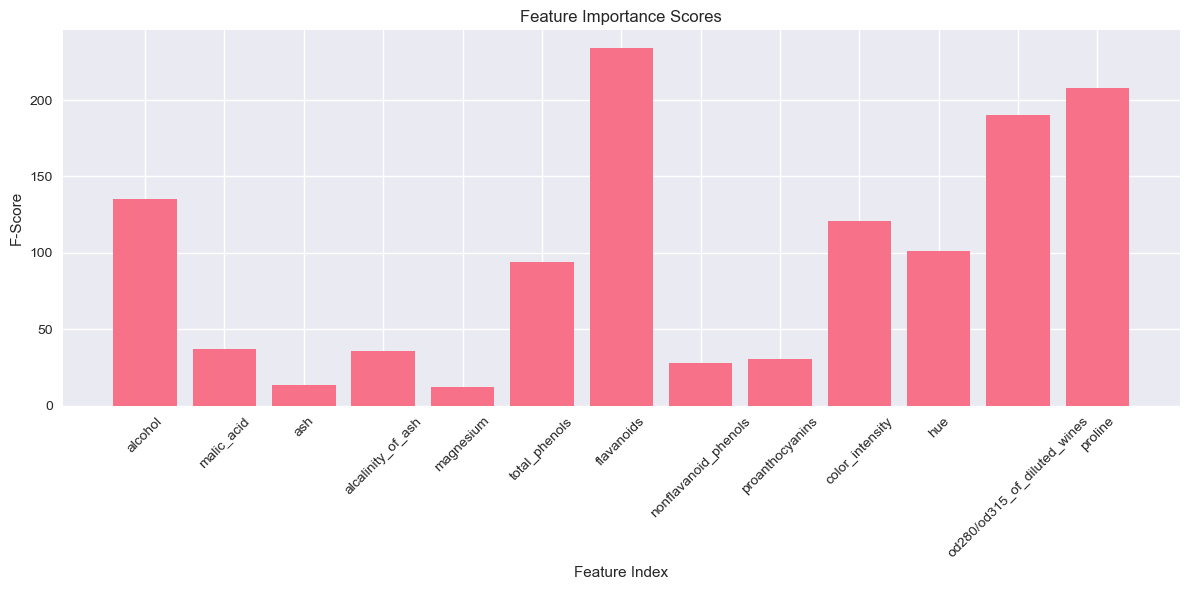

In [10]:
# 3. Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Statistical feature selection
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X, y)

# Get selected feature names and scores
selected_features = np.array(feature_names)[selector.get_support()]
feature_scores = selector.scores_

print("Top selected features:")
for feature, score in zip(selected_features, feature_scores[selector.get_support()]):
    print(f"{feature}: {score:.2f}")

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_scores)), feature_scores)
plt.xlabel('Feature Index')
plt.ylabel('F-Score')
plt.title('Feature Importance Scores')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train different models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True)
}

# Evaluate models
results = {}
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Fit and predict
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Store results
    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': (y_pred == y_test).mean(),
        'y_pred': y_pred,
        'model': model
    }
    
    print(f"\n{name}:")
    print(f"Cross-validation: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    print(f"Test accuracy: {(y_pred == y_test).mean():.3f}")


Logistic Regression:
Cross-validation: 0.984 (+/- 0.040)
Test accuracy: 0.981

Random Forest:
Cross-validation: 0.967 (+/- 0.062)
Test accuracy: 1.000

SVM:
Cross-validation: 0.992 (+/- 0.032)
Test accuracy: 0.981


Best Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



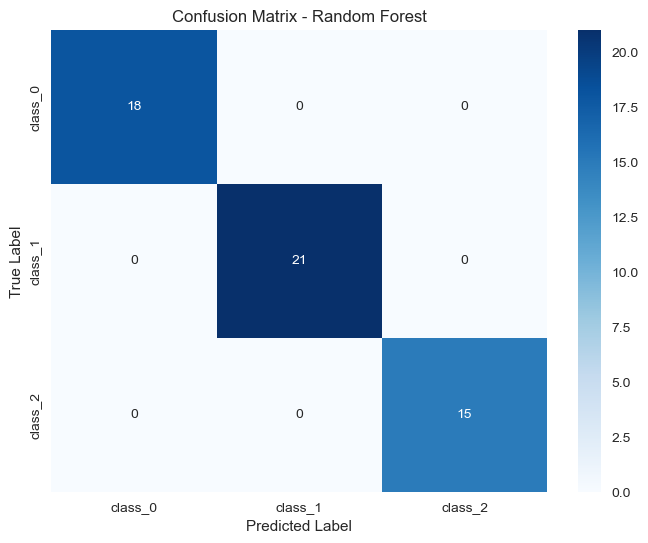

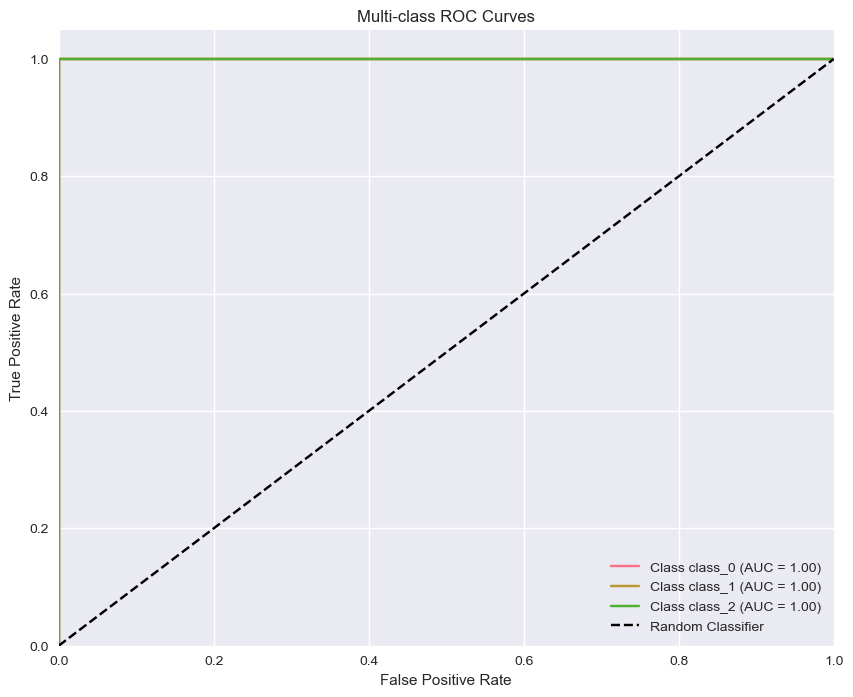

In [14]:
# Detailed evaluation for best model
best_model_name = max(results.keys(), key=lambda k: results[k]['test_accuracy'])
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['y_pred']

print(f"Best Model: {best_model_name}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=target_names))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve for multi-class (One-vs-Rest)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = best_model.predict_proba(X_test_scaled)

plt.figure(figsize=(10, 8))
for i in range(len(target_names)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {target_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend()
plt.show()

Digits dataset shape: (1797, 64)
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


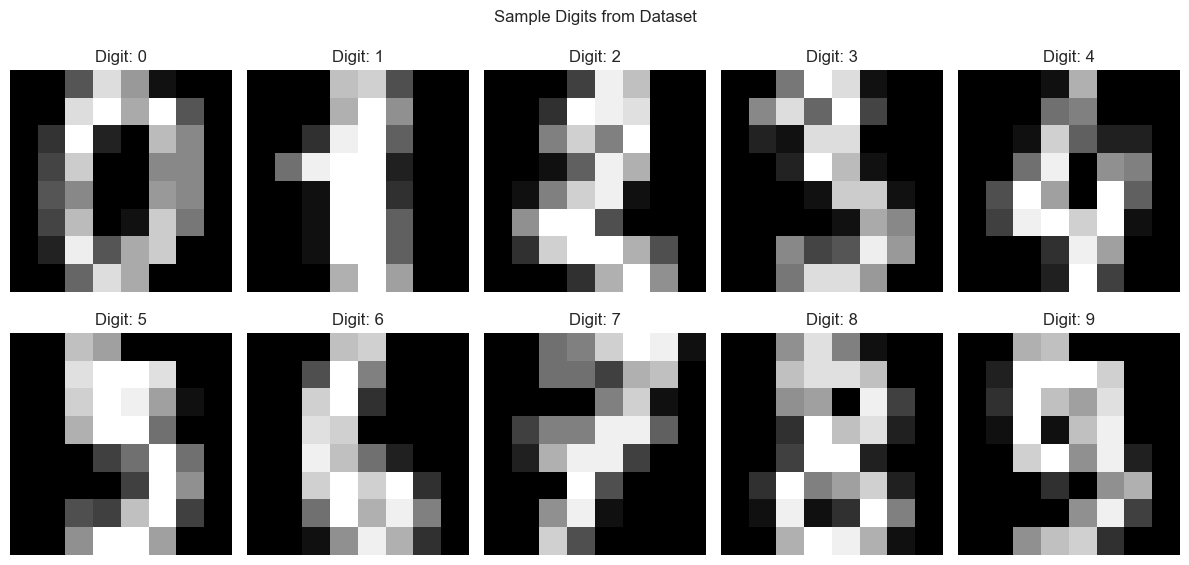

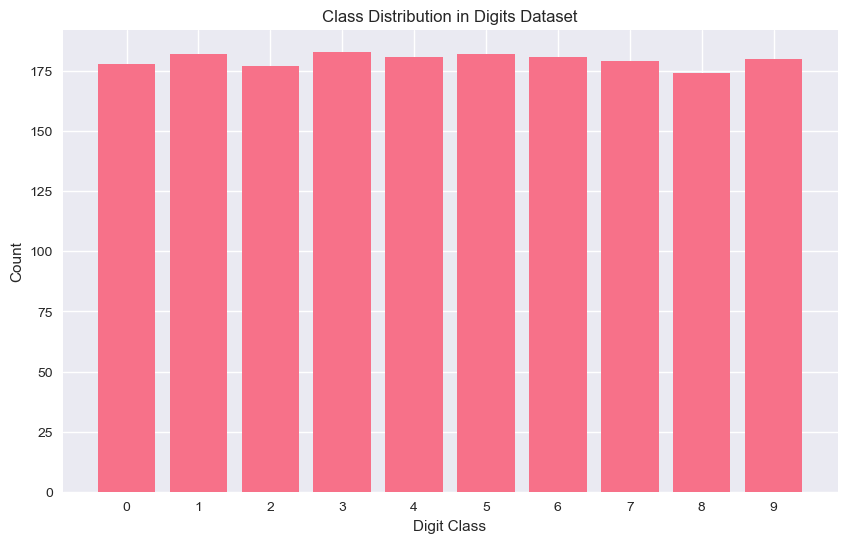

In [16]:
# Load digits dataset (0-9 digit recognition)
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

print(f"Digits dataset shape: {X_digits.shape}")
print(f"Number of classes: {len(np.unique(y_digits))}")
print(f"Classes: {np.unique(y_digits)}")

# Visualize some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Digit: {digits.target[i]}')
    ax.axis('off')
plt.suptitle('Sample Digits from Dataset')
plt.tight_layout()
plt.show()

# Check class distribution
plt.figure(figsize=(10, 6))
unique, counts = np.unique(y_digits, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.title('Class Distribution in Digits Dataset')
plt.xticks(unique)
plt.show()

In [18]:
# Multi-class classification with digits
X_train_dig, X_test_dig, y_train_dig, y_test_dig = train_test_split(
    X_digits, y_digits, test_size=0.3, random_state=42, stratify=y_digits
)

# Scale features
scaler_dig = StandardScaler()
X_train_dig_scaled = scaler_dig.fit_transform(X_train_dig)
X_test_dig_scaled = scaler_dig.transform(X_test_dig)

# Train multi-class classifiers
multiclass_models = {
    'Logistic Regression (OvR)': LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr'),
    'Logistic Regression (Multinomial)': LogisticRegression(random_state=42, max_iter=1000, multi_class='multinomial'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM (OvO)': SVC(random_state=42, decision_function_shape='ovo'),
    'SVM (OvR)': SVC(random_state=42, decision_function_shape='ovr')
}

# Evaluate multi-class models
multiclass_results = {}
for name, model in multiclass_models.items():
    model.fit(X_train_dig_scaled, y_train_dig)
    y_pred = model.predict(X_test_dig_scaled)
    accuracy = (y_pred == y_test_dig).mean()
    
    multiclass_results[name] = {
        'accuracy': accuracy,
        'y_pred': y_pred
    }
    
    print(f"{name}: {accuracy:.3f}")

Logistic Regression (OvR): 0.969
Logistic Regression (Multinomial): 0.981
Random Forest: 0.969
SVM (OvO): 0.983
SVM (OvR): 0.983



Best Multi-class Model: SVM (OvO)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      0.98      0.97        55
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        55
           4       0.95      0.98      0.96        54
           5       1.00      0.98      0.99        55
           6       0.98      1.00      0.99        54
           7       0.96      1.00      0.98        54
           8       1.00      0.94      0.97        52
           9       0.98      0.96      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



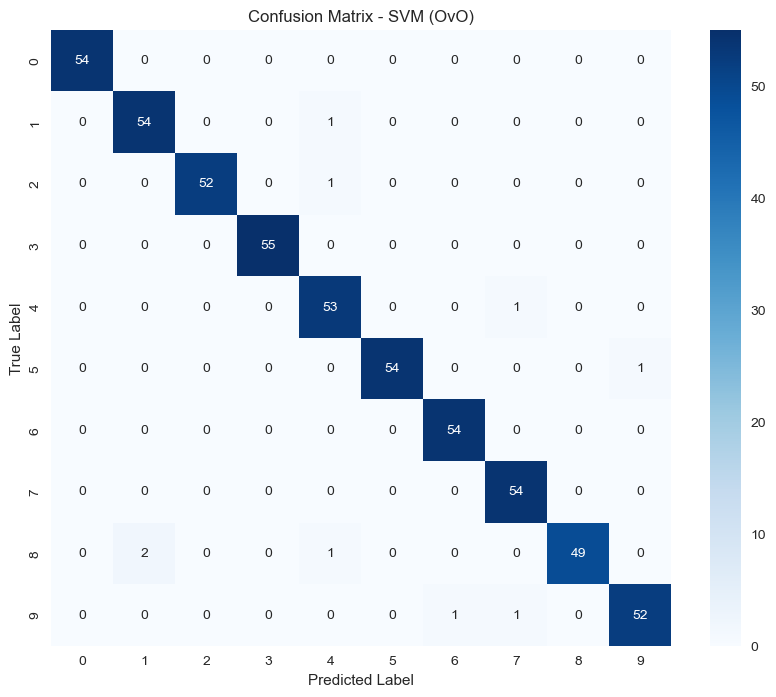

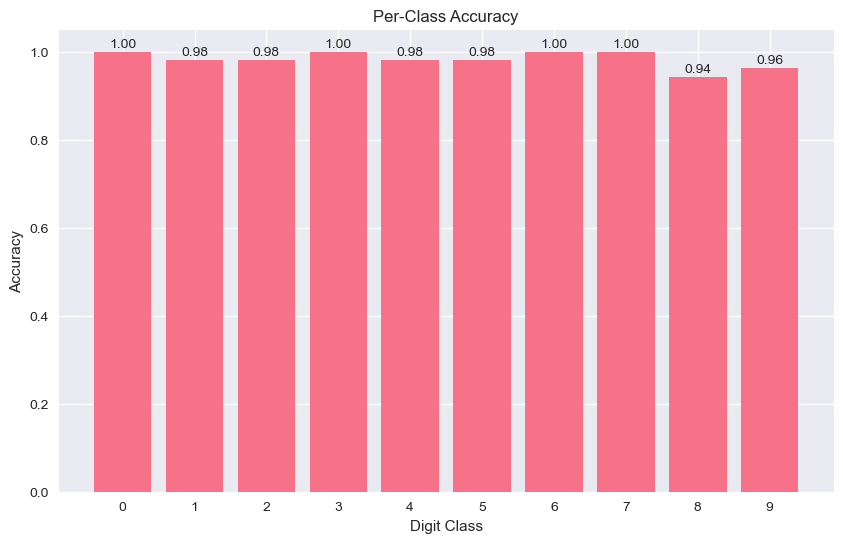

In [20]:
# Detailed analysis of best multi-class model
best_multiclass = max(multiclass_results.keys(), key=lambda k: multiclass_results[k]['accuracy'])
y_pred_multiclass = multiclass_results[best_multiclass]['y_pred']

print(f"\nBest Multi-class Model: {best_multiclass}")
print("\nClassification Report:")
print(classification_report(y_test_dig, y_pred_multiclass))

# Confusion matrix for 10-class problem
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_dig, y_pred_multiclass)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_multiclass}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Per-class accuracy analysis
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(10, 6))
plt.bar(range(10), per_class_accuracy)
plt.xlabel('Digit Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(10))
for i, acc in enumerate(per_class_accuracy):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')
plt.show()

Multi-label dataset shape: (1000, 20)
Labels shape: (1000, 5)
Number of labels per instance (first 10):
[1 3 2 1 2 0 0 1 5 4]


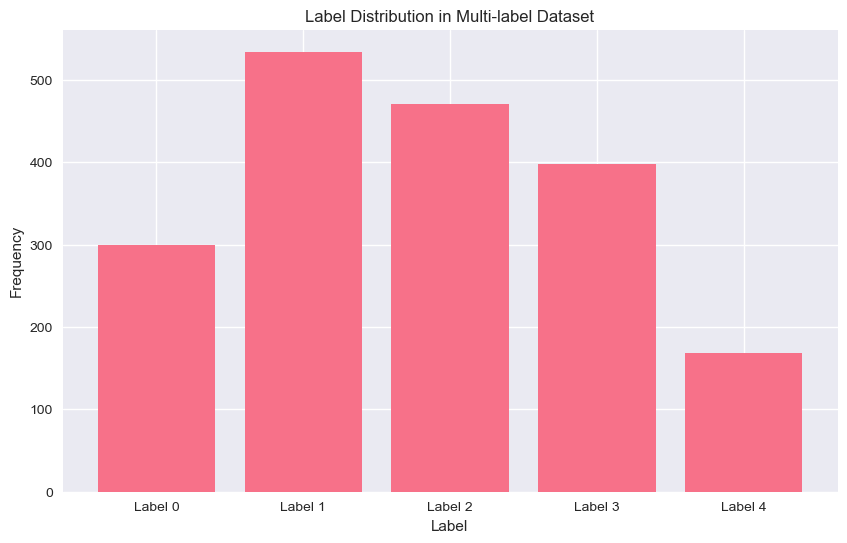

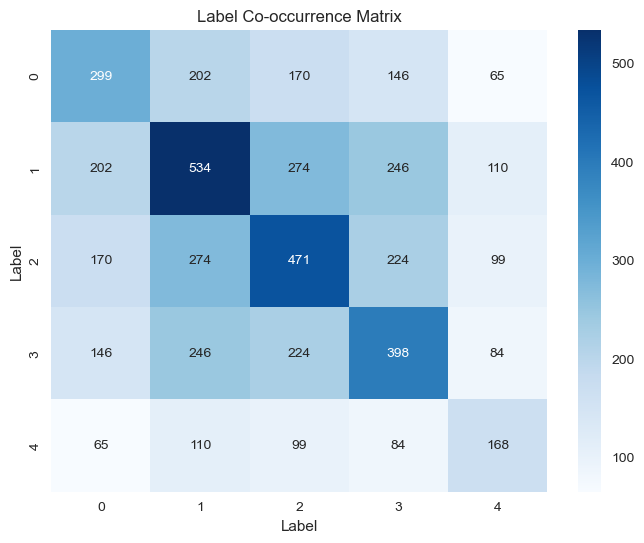

In [22]:
## Example 4: Multi-label Classification


# Create a synthetic multi-label dataset
X_multilabel, y_multilabel = make_multilabel_classification(
    n_samples=1000, n_features=20, n_classes=5, n_labels=2, random_state=42
)

print(f"Multi-label dataset shape: {X_multilabel.shape}")
print(f"Labels shape: {y_multilabel.shape}")
print(f"Number of labels per instance (first 10):")
print(y_multilabel[:10].sum(axis=1))

# Visualize label distribution
label_counts = y_multilabel.sum(axis=0)
plt.figure(figsize=(10, 6))
plt.bar(range(len(label_counts)), label_counts)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Distribution in Multi-label Dataset')
plt.xticks(range(len(label_counts)), [f'Label {i}' for i in range(len(label_counts))])
plt.show()

# Co-occurrence matrix
cooccurrence = np.dot(y_multilabel.T, y_multilabel)
plt.figure(figsize=(8, 6))
sns.heatmap(cooccurrence, annot=True, fmt='d', cmap='Blues')
plt.title('Label Co-occurrence Matrix')
plt.xlabel('Label')
plt.ylabel('Label')
plt.show()

In [24]:
# Multi-label classification approaches
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss, jaccard_score

# Split data
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X_multilabel, y_multilabel, test_size=0.3, random_state=42
)

# Scale features
scaler_ml = StandardScaler()
X_train_ml_scaled = scaler_ml.fit_transform(X_train_ml)
X_test_ml_scaled = scaler_ml.transform(X_test_ml)

# Different multi-label approaches
multilabel_models = {
    'Binary Relevance (Logistic)': MultiOutputClassifier(LogisticRegression(random_state=42)),
    'One-vs-Rest (Logistic)': OneVsRestClassifier(LogisticRegression(random_state=42)),
    'Binary Relevance (Random Forest)': MultiOutputClassifier(RandomForestClassifier(random_state=42, n_estimators=50)),
    'One-vs-Rest (Random Forest)': OneVsRestClassifier(RandomForestClassifier(random_state=42, n_estimators=50))
}

# Evaluate multi-label models
multilabel_results = {}
for name, model in multilabel_models.items():
    model.fit(X_train_ml_scaled, y_train_ml)
    y_pred_ml = model.predict(X_test_ml_scaled)
    
    # Multi-label specific metrics
    hamming = hamming_loss(y_test_ml, y_pred_ml)
    jaccard = jaccard_score(y_test_ml, y_pred_ml, average='samples')
    subset_accuracy = (y_pred_ml == y_test_ml).all(axis=1).mean()
    
    multilabel_results[name] = {
        'hamming_loss': hamming,
        'jaccard_score': jaccard,
        'subset_accuracy': subset_accuracy,
        'y_pred': y_pred_ml
    }
    
    print(f"\n{name}:")
    print(f"  Hamming Loss: {hamming:.3f}")
    print(f"  Jaccard Score: {jaccard:.3f}")
    print(f"  Subset Accuracy: {subset_accuracy:.3f}")


Binary Relevance (Logistic):
  Hamming Loss: 0.192
  Jaccard Score: 0.620
  Subset Accuracy: 0.423

One-vs-Rest (Logistic):
  Hamming Loss: 0.192
  Jaccard Score: 0.620
  Subset Accuracy: 0.423

Binary Relevance (Random Forest):
  Hamming Loss: 0.194
  Jaccard Score: 0.618
  Subset Accuracy: 0.437

One-vs-Rest (Random Forest):
  Hamming Loss: 0.194
  Jaccard Score: 0.618
  Subset Accuracy: 0.437


Best Multi-label Model: Binary Relevance (Logistic)


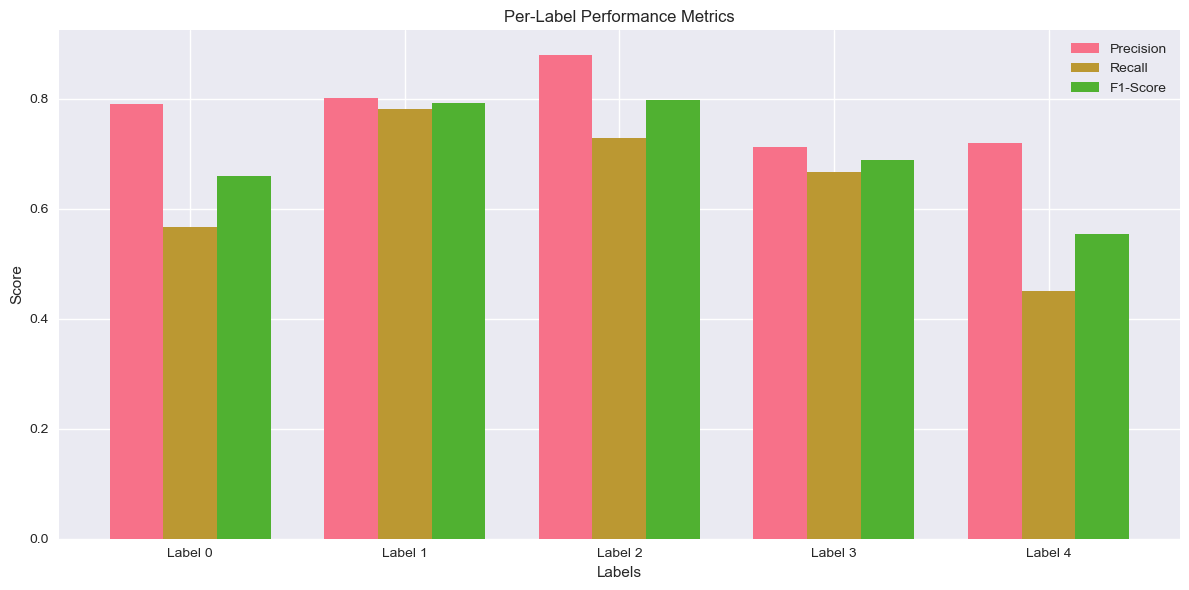


Sample Predictions vs True Labels:
Sample 1:
  True:      [0 0 1 0 0]
  Predicted: [0 1 1 0 0]
  Match: False
Sample 2:
  True:      [0 1 0 0 1]
  Predicted: [0 1 1 0 1]
  Match: False
Sample 3:
  True:      [1 1 1 0 0]
  Predicted: [0 1 1 0 0]
  Match: False
Sample 4:
  True:      [0 0 0 0 0]
  Predicted: [0 0 1 1 0]
  Match: False
Sample 5:
  True:      [0 0 0 0 0]
  Predicted: [0 1 0 0 0]
  Match: False


In [26]:
# Analyze multi-label predictions
best_ml_model = max(multilabel_results.keys(), key=lambda k: multilabel_results[k]['jaccard_score'])
y_pred_best_ml = multilabel_results[best_ml_model]['y_pred']

print(f"Best Multi-label Model: {best_ml_model}")

# Per-label evaluation
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(
    y_test_ml, y_pred_best_ml, average=None
)

# Visualize per-label performance
labels = [f'Label {i}' for i in range(y_multilabel.shape[1])]
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-Score')

ax.set_xlabel('Labels')
ax.set_ylabel('Score')
ax.set_title('Per-Label Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

# Prediction examples
print("\nSample Predictions vs True Labels:")
for i in range(5):
    print(f"Sample {i+1}:")
    print(f"  True:      {y_test_ml[i]}")
    print(f"  Predicted: {y_pred_best_ml[i]}")
    print(f"  Match: {np.array_equal(y_test_ml[i], y_pred_best_ml[i])}")

In [30]:
## Example 5: Real-world Application - Text Classification

# Simulate a text classification problem (e.g., news categorization)
# In practice, you would load actual text data and use NLP preprocessing

# Create sample text features (simulating TF-IDF vectors)
np.random.seed(42)
n_samples = 1000
n_features = 500

# Simulate TF-IDF features for news articles
X_text = np.random.exponential(0.1, (n_samples, n_features))  # Sparse-like distribution
X_text = (X_text > 0.5).astype(float)  # Make it more sparse

# Multi-class labels (news categories)
categories = ['Politics', 'Sports', 'Technology', 'Entertainment', 'Health']
y_text_multiclass = np.random.choice(len(categories), n_samples)

# Multi-label scenario (articles can have multiple tags)
y_text_multilabel = np.random.binomial(1, 0.3, (n_samples, len(categories)))

print("Text Classification Simulation:")
print(f"Features shape: {X_text.shape}")
print(f"Sparsity: {(X_text == 0).mean():.2%}")
print(f"Multi-class distribution: {np.bincount(y_text_multiclass)}")
print(f"Multi-label average labels per article: {y_text_multilabel.mean(axis=0)}")

Text Classification Simulation:
Features shape: (1000, 500)
Sparsity: 99.33%
Multi-class distribution: [194 172 198 223 213]
Multi-label average labels per article: [0.308 0.306 0.295 0.282 0.293]


In [32]:
# Feature engineering for text data (simulated)
from sklearn.feature_selection import chi2

# Feature selection using chi-squared test
selector_text = SelectKBest(chi2, k=100)
X_text_selected = selector_text.fit_transform(X_text, y_text_multiclass)

print(f"Selected {X_text_selected.shape[1]} features out of {X_text.shape[1]}")

# Train models for text classification
X_train_txt, X_test_txt, y_train_txt, y_test_txt = train_test_split(
    X_text_selected, y_text_multiclass, test_size=0.3, random_state=42
)

# Text classification models
text_models = {
    'Multinomial Naive Bayes': LogisticRegression(random_state=42, multi_class='multinomial'),
    'Linear SVM': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

print("\nText Classification Results:")
for name, model in text_models.items():
    model.fit(X_train_txt, y_train_txt)
    accuracy = model.score(X_test_txt, y_test_txt)
    print(f"{name}: {accuracy:.3f}")

Selected 100 features out of 500

Text Classification Results:
Multinomial Naive Bayes: 0.307
Linear SVM: 0.273
Random Forest: 0.280


## Key Takeaways and Best Practices

### Feature Engineering Best Practices:
1. **Start simple**: Begin with basic features before creating complex ones
2. **Domain knowledge**: Use your understanding of the problem domain
3. **Iterate**: Feature engineering is an iterative process
4. **Validate**: Always validate new features with cross-validation
5. **Document**: Keep track of feature transformations for reproducibility

### Model Evaluation Best Practices:
1. **Choose appropriate metrics**: Don't rely solely on accuracy
2. **Use cross-validation**: Get robust performance estimates
3. **Check for overfitting**: Monitor training vs. validation performance
4. **Analyze errors**: Look at confusion matrices and misclassified examples
5. **Consider business impact**: Align metrics with business objectives

### Debugging Best Practices:
1. **Start with simple models**: Baseline before complexity
2. **Check data quality**: Look for inconsistencies, missing values, outliers
3. **Validate preprocessing**: Ensure transformations are applied correctly
4. **Monitor learning curves**: Plot training/validation scores vs. training size
5. **Use visualization**: Plot predictions, residuals, feature distributions

### Multi-class/Multi-label Best Practices:
1. **Understand the problem**: Is it truly multi-class or could it be multiple binary problems?
2. **Check class balance**: Use stratified sampling and appropriate metrics
3. **Consider label dependencies**: Some algorithms can capture label relationships
4. **Evaluate thoroughly**: Use both aggregate and per-class/per-label metrics
5. **Handle computational complexity**: Multi-label can be computationally expensive

---

## Summary

This notebook covered essential practical aspects of machine learning:

1. **Feature Engineering**: Techniques to create better input representations
2. **Model Evaluation**: Comprehensive metrics beyond simple accuracy
3. **Debugging**: Systematic approaches to identify and fix model issues
4. **Multi-class Classification**: Handling problems with multiple exclusive classes
5. **Multi-label Classification**: Dealing with instances that can belong to multiple classes